<a href="https://colab.research.google.com/github/diamantidisgeorgios/exercise10/blob/main/exercise_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Libraries

In [20]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_distances
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import euclidean_distances
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import HDBSCAN
import numpy as np

#Read file

In [2]:
df = pd.read_csv('dataset.csv')
df

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,...,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,...,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,...,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,...,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


#Split dataframe

In [3]:
ls = ['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name']
df1 = df[ls]
df2 = df.drop(columns=ls)
df2

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,21,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,22,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,22,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,41,283893,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


#One-Hot encoding on the track_genre columns

In [4]:
one_hot = pd.get_dummies(df2['track_genre'])
df2 = df2.drop('track_genre',axis = 1)
df2 = df2.join(one_hot)
df2

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,...,spanish,study,swedish,synth-pop,tango,techno,trance,trip-hop,turkish,world-music
0,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,...,False,False,False,False,False,False,False,False,False,False
1,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,...,False,False,False,False,False,False,False,False,False,False
2,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,...,False,False,False,False,False,False,False,False,False,False
3,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,...,False,False,False,False,False,False,False,False,False,False
4,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,21,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,...,False,False,False,False,False,False,False,False,False,True
113996,22,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,...,False,False,False,False,False,False,False,False,False,True
113997,22,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,...,False,False,False,False,False,False,False,False,False,True
113998,41,283893,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,...,False,False,False,False,False,False,False,False,False,True


#Normalizing

Since k-mean works with distances the method thats used is the minmax only on the arithmetic features

In [5]:
arithmetic_features = ['popularity', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']
df2[arithmetic_features]
scaler = MinMaxScaler()
df2[arithmetic_features] = scaler.fit_transform(df2[arithmetic_features])
df2

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,...,spanish,study,swedish,synth-pop,tango,techno,trance,trip-hop,turkish,world-music
0,0.73,0.044043,False,0.686294,0.4610,1,0.791392,0,0.148187,0.032329,...,False,False,False,False,False,False,False,False,False,False
1,0.55,0.028566,False,0.426396,0.1660,1,0.597377,1,0.079067,0.927711,...,False,False,False,False,False,False,False,False,False,False
2,0.57,0.040255,False,0.444670,0.3590,0,0.736123,1,0.057720,0.210843,...,False,False,False,False,False,False,False,False,False,False
3,0.71,0.038557,False,0.270051,0.0596,0,0.573701,1,0.037617,0.908635,...,False,False,False,False,False,False,False,False,False,False
4,0.82,0.037969,False,0.627411,0.4430,2,0.737103,1,0.054508,0.470884,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,0.21,0.073511,False,0.174619,0.2350,5,0.612952,1,0.043731,0.642570,...,False,False,False,False,False,False,False,False,False,True
113996,0.22,0.073511,False,0.176650,0.1170,0,0.577345,0,0.041554,0.997992,...,False,False,False,False,False,False,False,False,False,True
113997,0.22,0.051833,False,0.638579,0.3290,0,0.714648,0,0.043523,0.870482,...,False,False,False,False,False,False,False,False,False,True
113998,0.41,0.054206,False,0.595939,0.5060,7,0.714759,1,0.030777,0.382530,...,False,False,False,False,False,False,False,False,False,True


#Clustering with k-Means

In [6]:
ks = [2, 3, 5, 7, 10, 15, 20]
sse = []
for k in ks:
  kmeans = KMeans(n_clusters=k, random_state=0, n_init="auto").fit(df2)
  sse.append(kmeans.inertia_)

#Plot for different number of clusters

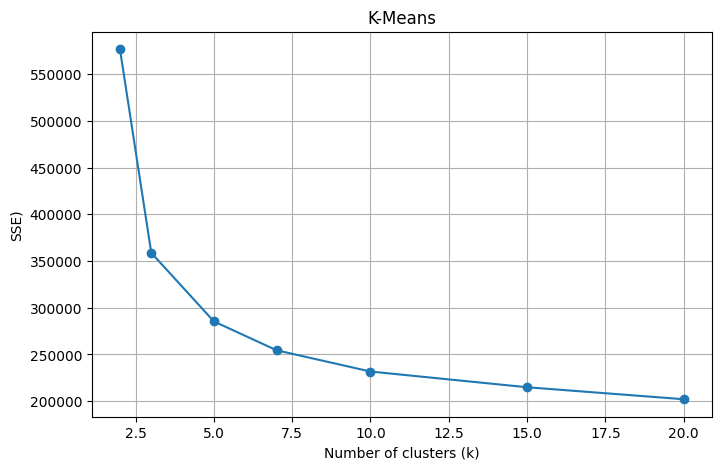

In [7]:
plt.figure(figsize=(8,5))
plt.plot(ks, sse, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("SSE)")
plt.title("K-Means")
plt.grid(True)
plt.show()

According to the elbow method, the best k is 5

#Clustering and labeling with the optimal k

In [8]:
labels = KMeans(n_clusters=5, random_state=0, n_init="auto").fit_predict(df2)

In [9]:
labels

array([1, 1, 1, ..., 1, 0, 1], dtype=int32)

#Find the most dominant genre in every cluster

In [10]:
genre_per_cluster = df['track_genre']
genre_per_cluster = pd.DataFrame(genre_per_cluster).join(pd.DataFrame(labels))


In [11]:
genre = []
percent = []

for i in range(5):
  cluster_data = genre_per_cluster[genre_per_cluster[0] == i]
  genre.append(cluster_data['track_genre'].value_counts().index[0])
  percent.append(cluster_data['track_genre'].value_counts()[0]/len(cluster_data))

/tmp/ipython-input-545673022.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  percent.append(cluster_data['track_genre'].value_counts()[0]/len(cluster_data))
/tmp/ipython-input-545673022.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  percent.append(cluster_data['track_genre'].value_counts()[0]/len(cluster_data))
/tmp/ipython-input-545673022.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  percent.append(cluster_data['trac

#Show plot of the most dominant genre per cluster

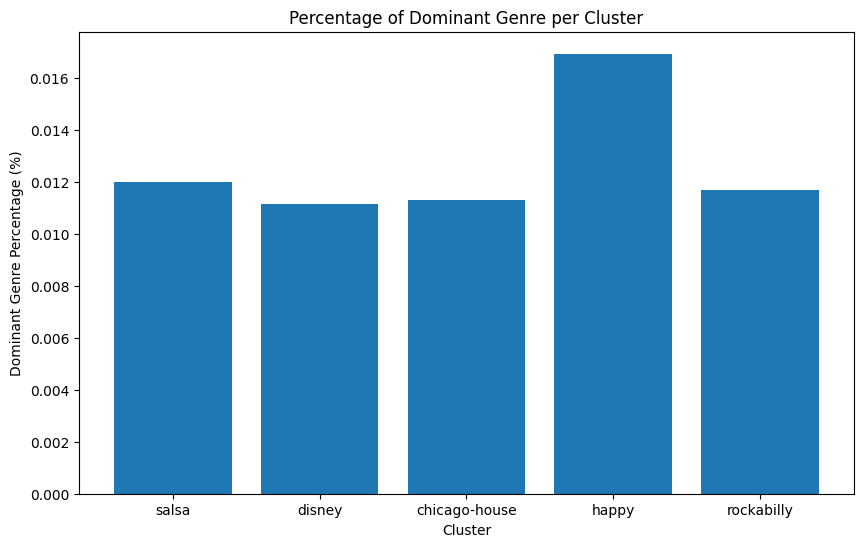

In [12]:
plt.figure(figsize=(10,6))
plt.bar(
    genre, percent
)

plt.xlabel("Cluster")
plt.ylabel("Dominant Genre Percentage (%)")
plt.title("Percentage of Dominant Genre per Cluster")
plt.xticks(range(5))

plt.show()

#Get 3 recomented songs based on a request song

In [13]:

labels = pd.DataFrame(labels)
song_to_search = "While My Guitar Gently Weeps"
if not (df["track_name"] == song_to_search).any():
  print("The song does not exist")
else:
  #get cluster the chosen song belongs to
  song_cluster_number = labels[df["track_name"] == song_to_search].values[0][0]


  #get the choses songs' index
  favorite_id = labels[df["track_name"] == song_to_search].index

  #get its track id
  favorite_track_id = df.iloc[favorite_id[0]]["track_id"]

  #get all songs' cluster number
  id_of_all_songs_in_cluster = genre_per_cluster[genre_per_cluster[0] == song_cluster_number].index

  #get the distances
  df2= pd.DataFrame(df2)
  distances = euclidean_distances(
      df2.iloc[favorite_id[0]].values.reshape(1, -1),
      df2.iloc[id_of_all_songs_in_cluster].values
  )[0]

  #make the distance dataframe
  df_distances = pd.DataFrame({
      "index": id_of_all_songs_in_cluster,
      "distance": distances,
  })

  #remove the song from the dataframe
  df_distances = df_distances[df_distances["index"] != favorite_id[0]]

  #get top 3
  top_3 = df_distances.nsmallest(3, "distance")

  recommendations = df.loc[top_3["index"], ["track_name", "artists"]]
  print(f'Requested song: {df.iloc[favorite_id,:]["track_name"].values[0]}  by {df.iloc[favorite_id,:]["artists"].values[0]}')
  print(recommendations)

Requested song: While My Guitar Gently Weeps  by The Jeff Healey Band
               track_name         artists
8528  Foto Dalam Dompetmu           Slank
8316          Mawar Merah           Slank
8569                  Nia  The Panasdalam


In my opinion the recommendations match the requested song

#Doing the same but with Cosine Distance  (1 – Cosine Similarity)

In [14]:
labels = pd.DataFrame(labels)
song_to_search = "While My Guitar Gently Weeps"
if not (df["track_name"] == song_to_search).any():
  print("The song does not exist")
else:
  #get cluster the chosen song belongs to
  song_cluster_number = labels[df["track_name"] == song_to_search].values[0][0]


  #get the choses songs' index
  favorite_id = labels[df["track_name"] == song_to_search].index

  #get its track id
  favorite_track_id = df.iloc[favorite_id[0]]["track_id"]

  #get all songs' cluster number
  id_of_all_songs_in_cluster = genre_per_cluster[genre_per_cluster[0] == song_cluster_number].index

  #get the distances
  df2= pd.DataFrame(df2)
  distances = cosine_distances(
      df2.iloc[favorite_id[0]].values.reshape(1, -1),
      df2.iloc[id_of_all_songs_in_cluster].values
  )[0] * (1 - cosine_similarity(
      df2.iloc[favorite_id[0]].values.reshape(1, -1),
      df2.iloc[id_of_all_songs_in_cluster].values
  )[0])

  #make the distance dataframe
  df_distances = pd.DataFrame({
      "index": id_of_all_songs_in_cluster,
      "distance": distances,
  })

  #remove the song from the dataframe
  df_distances = df_distances[df_distances["index"] != favorite_id[0]]

  #get top 3
  top_3 = df_distances.nsmallest(3, "distance")

  recommendations = df.loc[top_3["index"], ["track_name", "artists"]]
  print(f'Requested song: {df.iloc[favorite_id,:]["track_name"].values[0]}  by {df.iloc[favorite_id,:]["artists"].values[0]}')
  print(recommendations)

Requested song: While My Guitar Gently Weeps  by The Jeff Healey Band
               track_name         artists
8528  Foto Dalam Dompetmu           Slank
8316          Mawar Merah           Slank
8569                  Nia  The Panasdalam


The recommendations are exactly the same

#Trying to cluster with HDBSCAN

In [15]:
hdb = HDBSCAN(copy=True, n_jobs=-1)
hdb.fit(df2)

HDBSCAN(copy=True, n_jobs=-1)

In [27]:
labels = hdb.labels_
np.unique(labels)


Now there are 4711 clusters combared to 5 from before

In [36]:
genre_per_cluster[0]

,0
0,1
1,1
2,1
3,1
4,1
...,...
113995,4
113996,1
113997,1
113998,0


In [37]:
labels = pd.DataFrame(labels)
genre_per_cluster = df['track_genre']
genre_per_cluster = pd.DataFrame(genre_per_cluster).join(pd.DataFrame(labels))
song_to_search = "While My Guitar Gently Weeps"
if not (df["track_name"] == song_to_search).any():
  print("The song does not exist")
else:
  #get cluster the chosen song belongs to
  song_cluster_number = labels[df["track_name"] == song_to_search].values[0][0]


  #get the choses songs' index
  favorite_id = labels[df["track_name"] == song_to_search].index

  #get its track id
  favorite_track_id = df.iloc[favorite_id[0]]["track_id"]

  #get all songs' cluster number
  id_of_all_songs_in_cluster = genre_per_cluster[genre_per_cluster[0] == song_cluster_number].index

  #get the distances
  df2= pd.DataFrame(df2)
  distances = euclidean_distances(
      df2.iloc[favorite_id[0]].values.reshape(1, -1),
      df2.iloc[id_of_all_songs_in_cluster].values
  )[0]

  #make the distance dataframe
  df_distances = pd.DataFrame({
      "index": id_of_all_songs_in_cluster,
      "distance": distances,
  })

  #remove the song from the dataframe
  df_distances = df_distances[df_distances["index"] != favorite_id[0]]

  #get top 3
  top_3 = df_distances.nsmallest(3, "distance")

  recommendations = df.loc[top_3["index"], ["track_name", "artists"]]
  print(f'Requested song: {df.iloc[favorite_id,:]["track_name"].values[0]}  by {df.iloc[favorite_id,:]["artists"].values[0]}')
  print(recommendations)

Requested song: While My Guitar Gently Weeps  by The Jeff Healey Band
               track_name         artists
8528  Foto Dalam Dompetmu           Slank
8316          Mawar Merah           Slank
8569                  Nia  The Panasdalam
